# A Network of Thrones - Season 2

**Marco Uderzo, ID 2096998**


marco.uderzo@studenti.unipd.it

In [1]:
!pip install igraph
!pip install cairocffi
!pip install scikit-network
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 30.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import itertools
import networkx as nx
import igraph as ig
import ast
import cairocffi as cairo
import random
import math
import json
import numpy as np
import matplotlib.pyplot as plt
from sknetwork.clustering import get_modularity

In [3]:
from google.colab import drive
drive.mount('/content/drive')
folder = 'drive/MyDrive/NetworkScience/'

Mounted at /content/drive


In [4]:
relations_df = pd.read_csv(folder+"data/got-s2-edges.csv")
characters_df  = pd.read_csv(folder+"data/got-s2-nodes.csv")

In [5]:
# Delete self-loops - there are no self-loops in the data.

#self_loop = []
#for i in range(len(relations)):
#  if relations["Source"][i] == relations["Target"][i]:
#    self_loop.append(i)
#
#
#relations = relations.drop(set(self_loop)).reset_index()

In [6]:
import networkx as nx

# Check for duplicate Ids
duplicates = characters_df[characters_df.duplicated('Id', keep=False)]
if not duplicates.empty:
    print("Duplicate Ids found in characters_df:")
    print(duplicates)

# Remove duplicates based on Id (keeping the first occurrence)
characters_df = characters_df.drop_duplicates(subset='Id')

# Create the NetworkX graph from the edge list
G = nx.from_pandas_edgelist(relations_df, 'Source', 'Target', ['Weight'])

# Convert characters DataFrame to dictionary and add nodes with attributes
characters = characters_df.set_index('Id').to_dict('index')

G.add_nodes_from(characters.items())
print(G.nodes(data=True))
print(G.edges(data=True))

[('CERSEI', {'Label': 'Cersei'}), ('TYRION', {'Label': 'Tyrion'}), ('DAENERYS', {'Label': 'Daenerys'}), ('JORAH', {'Label': 'Jorah'}), ('ARYA', {'Label': 'Arya'}), ('JAQEN', {'Label': 'Jaqen'}), ('DAVOS', {'Label': 'Davos'}), ('STANNIS', {'Label': 'Stannis'}), ('JON', {'Label': 'Jon'}), ('YGRITTE', {'Label': 'Ygritte'}), ('ROBB', {'Label': 'Robb'}), ('TALISA', {'Label': 'Talisa'}), ('TYWIN', {'Label': 'Tywin'}), ('VARYS', {'Label': 'Varys'}), ('SHAE', {'Label': 'Shae'}), ('BRONN', {'Label': 'Bronn'}), ('THEON', {'Label': 'Theon'}), ('YARA', {'Label': 'Yara'}), ('CATELYN', {'Label': 'Catelyn'}), ('XARO', {'Label': 'Xaro'}), ('JOFFREY', {'Label': 'Joffrey'}), ('GENDRY', {'Label': 'Gendry'}), ('SANSA', {'Label': 'Sansa'}), ('QHORIN', {'Label': 'Quorin'}), ('BALON', {'Label': 'Balon'}), ('SPICE_KING', {'Label': 'Spice King'}), ('MATTHOS', {'Label': 'Matthos'}), ('MELISANDRE', {'Label': 'Melisandre'}), ('BRAN', {'Label': 'Bran'}), ('OSHA', {'Label': 'Osha'}), ('BRIENNE', {'Label': 'Brienne'

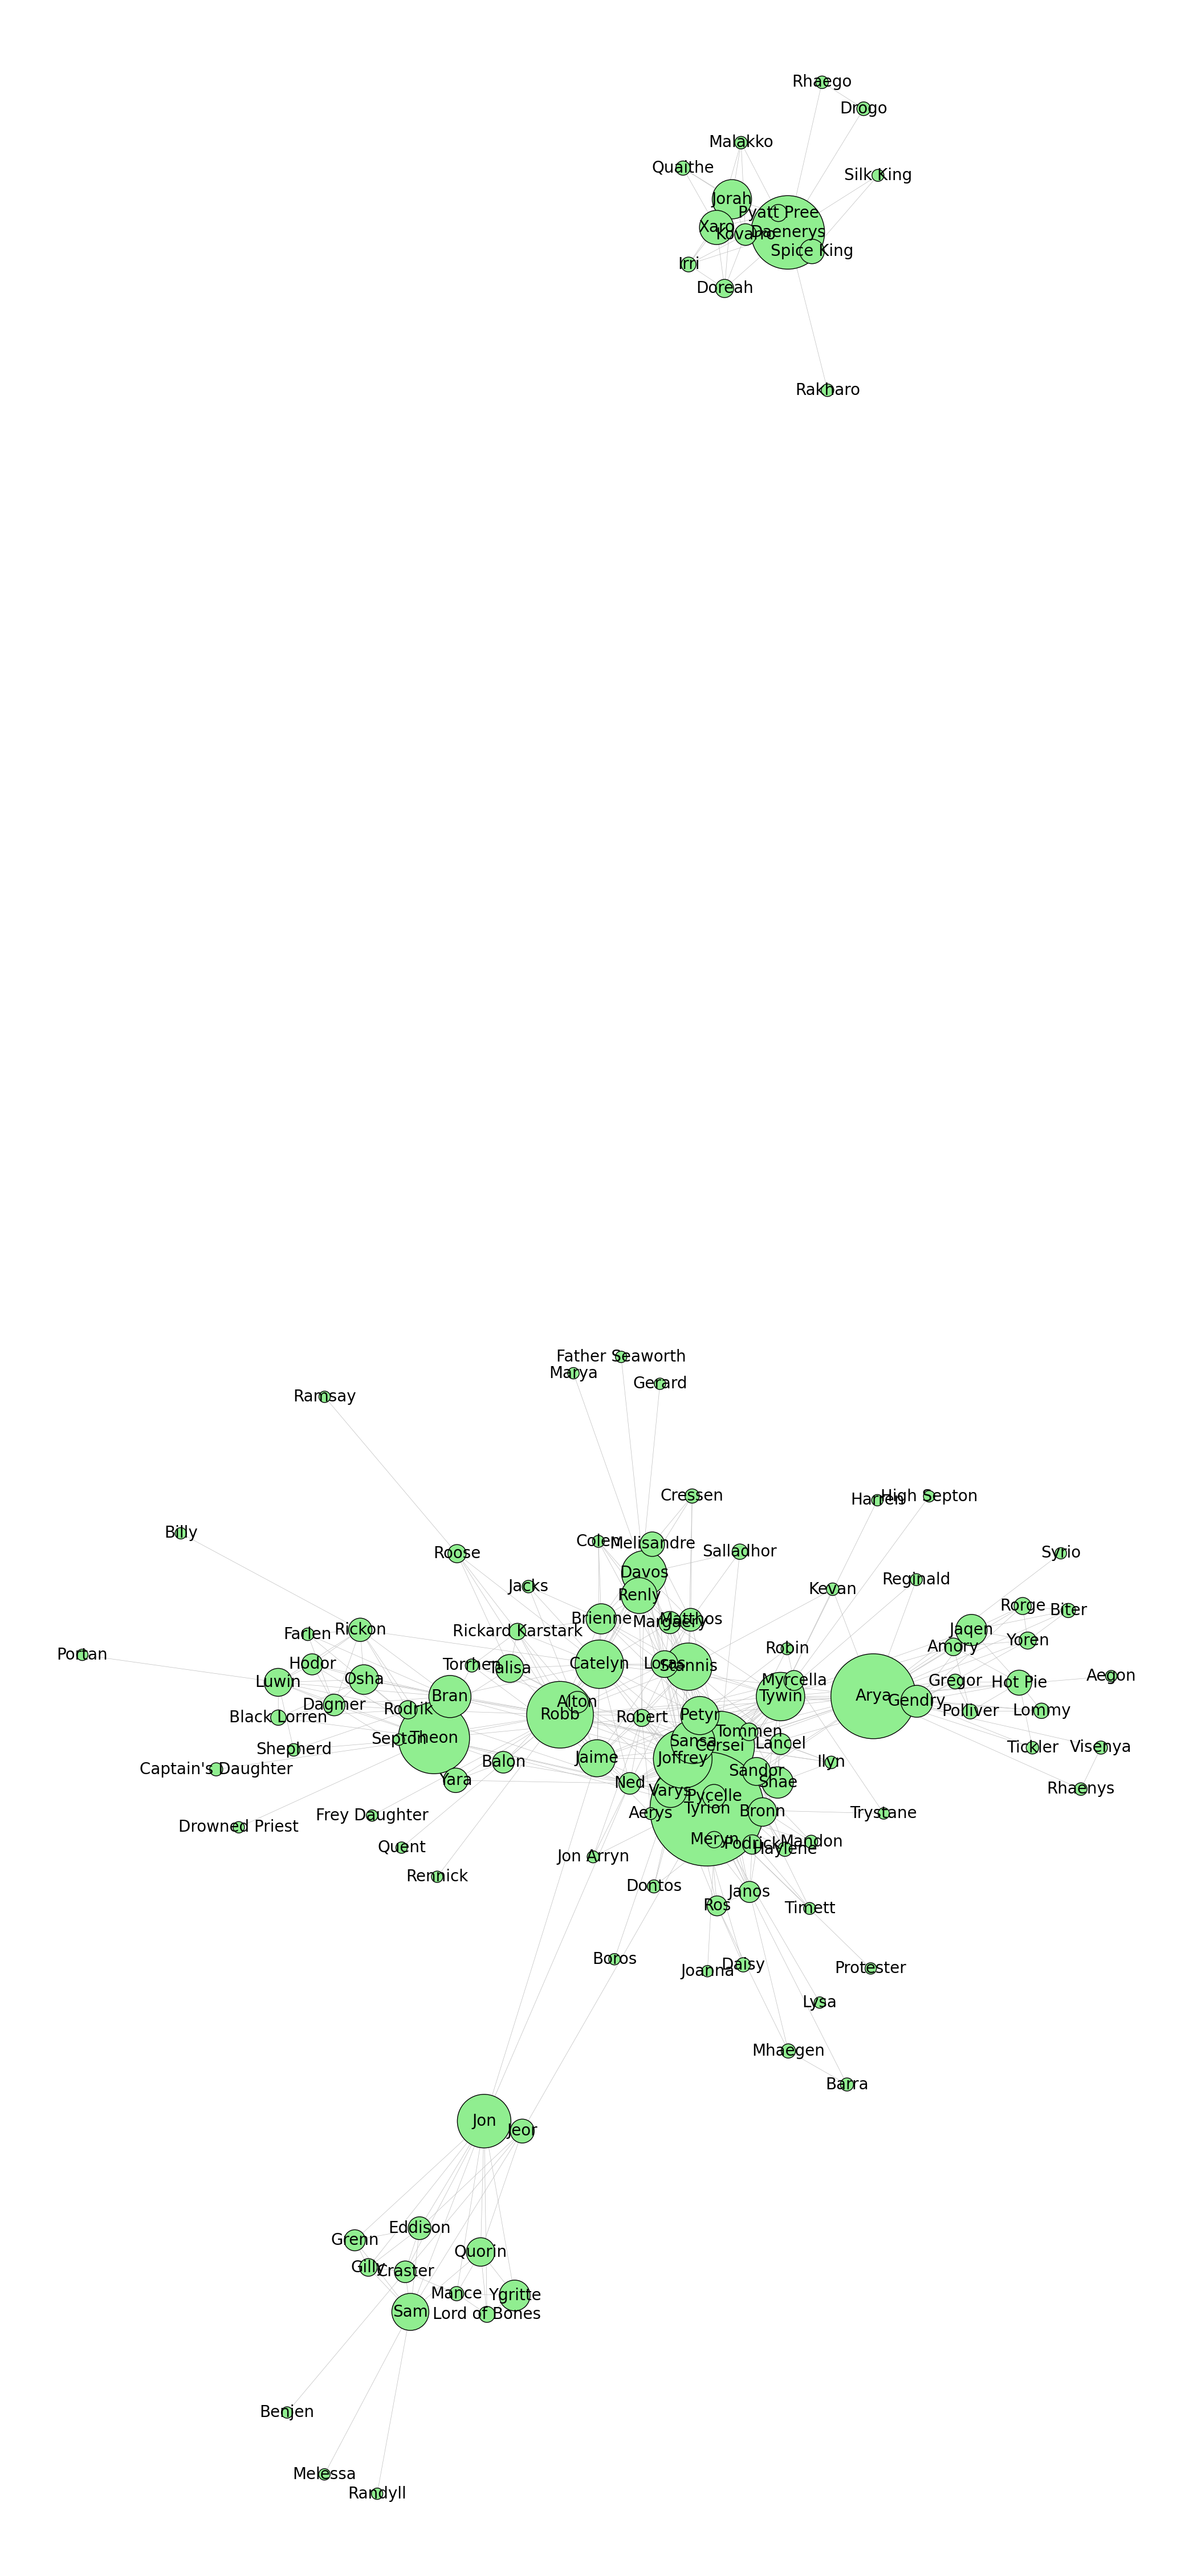

In [7]:
g = ig.Graph.from_networkx(G)

# Generate the spring layout using NetworkX
spring_layout = nx.spring_layout(G)

# Prepare colors for the nodes
node_colors = ["LightGreen" for _ in range(len(G.nodes()))]

# Apply PageRank
pagerank_scores = g.pagerank(weights='Weight')
pagerank_scores = np.array(pagerank_scores)
pagerank_scores_log = np.log1p(pagerank_scores)


# Set the node sizes based on PageRank
min_size = 20  # Minimum node size
max_size = 200  # Maximum node size
size_range = max_size - min_size
node_sizes = min_size + size_range * (pagerank_scores_log - np.min(pagerank_scores_log)) / (np.max(pagerank_scores_log) - np.min(pagerank_scores_log))

# Add positions to igraph nodes
positions = spring_layout
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]
g.vs["pagerank"] = pagerank_scores

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 45))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"] if "Label" in g.vs.attributes() else None,
    vertex_label_size=20,
    edge_color="grey",
    edge_width=0.5
)

plt.show()


Let's list the various characters

In [8]:
for nm in g.vs():
  print(nm['Label'])

Cersei
Tyrion
Daenerys
Jorah
Arya
Jaqen
Davos
Stannis
Jon
Ygritte
Robb
Talisa
Tywin
Varys
Shae
Bronn
Theon
Yara
Catelyn
Xaro
Joffrey
Gendry
Sansa
Quorin
Balon
Spice King
Matthos
Melisandre
Bran
Osha
Brienne
Jaime
Pycelle
Dagmer
Sandor
Luwin
Alton
Hot Pie
Renly
Janos
Sam
Loras
Jeor
Lancel
Podrick
Margaery
Eddison
Grenn
Roose
Petyr
Rickon
Kovarro
Craster
Hodor
Salladhor
Tommen
Gilly
Pyatt Pree
Rodrik
Ros
Black Lorren
Yoren
Doreah
Quaithe
Captain's Daughter
Rickard Karstark
Daisy
Amory
Rorge
Cressen
Lord of Bones
Irri
Dontos
Haylene
Meryn
Myrcella
Rakharo
Gregor
Ned
Drogo
Lommy
Kevan
Mance
Biter
Jacks
Mandon
Reginald
Polliver
Shepherd
Farlen
Robert
Tickler
Torrhen
Drowned Priest
Gerard
Timett
Aerys
Barra
Mhaegen
Colen
Rhaego
Silk King
Ilyn
Visenya
Malakko
Jon Arryn
Robin
Portan
Quent
Septon
Aegon
Rhaenys
Syrio
Benjen
Billy
Boros
Joanna
Father Seaworth
Marya
Frey Daughter
Harren
High Septon
Lysa
Melessa
Trystane
Protester
Ramsay
Randyll
Rennick


### Size

In [9]:
nodes = g.vs()
edges = g.es()

print("Number of possible edges (N*(N-1)):", int(len(nodes)*(len(nodes)-1)/2))
print("Number of nodes (Graph Order):", len(nodes))
print("Number of edges (Graph Size):", len(edges))

# Graph Density: how connected are the nodes. Calculated by: n_edges/n_possible_edges
print("Graph Density:", g.density())

Number of possible edges (N*(N-1)): 8256
Number of nodes (Graph Order): 129
Number of edges (Graph Size): 486
Graph Density: 0.05886627906976744


### Distribution

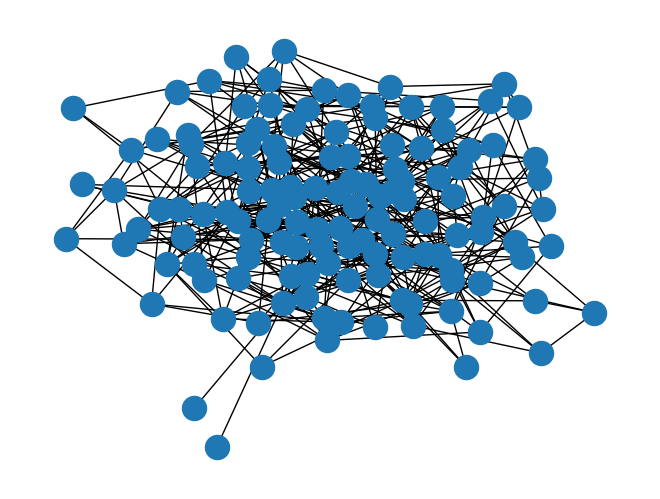

In [10]:
#Generate an appropriate ensemble of null-model networks, such as Erdős–Rényi random graphs, or Maslov–Sneppen random graphs.
rand_net = nx.erdos_renyi_graph(len(G.nodes()), len(G.edges())/(len(G.nodes())*(len(G.nodes()) - 1)/2), seed=None, directed=False)
nx.draw(rand_net)

In [11]:
#Calculate the average of the mean shortest path length Lr over this ensemble of null-model networks; calculate Cr analogously.
print("number of nodes in random net:", len(rand_net.nodes()), "number of edges in random net", len(rand_net.edges()))
print("average shortest path for the random network", nx.average_shortest_path_length(rand_net))
print("clustering coefficient for the random network", nx.average_clustering(rand_net))

number of nodes in random net: 129 number of edges in random net 476
average shortest path for the random network 2.643653100775194
clustering coefficient for the random network 0.060063063551435605


In [12]:
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)


# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
print("normalised average shortest path for the original network", avg_shortest_path / nx.average_shortest_path_length(rand_net))
print("normalised clustering coefficient for the original network", nx.average_clustering(G) / nx.average_clustering(rand_net))


normalised average shortest path for the original network 1.080838023888122
normalised clustering coefficient for the original network 9.602844645294244


The idea is that:
- Small-world networks should have some spatial structure, which is reflected by a high clustering coefficient.
By contrast, random networks have no such structure and a low clustering coefficient.
- Small-world networks are efficient in communicating and similar and thus have a small shortest path length,
comparable to that of random networks. By contrast, purely spatial networks have a high shortest path length.

In [13]:
# Calculate the normalised shortest path λ:=L/Lr. and γ:=C/Cr
lambda_val = avg_shortest_path / nx.average_shortest_path_length(rand_net)
gamma_val = nx.average_clustering(G) / nx.average_clustering(rand_net)

# Check small-world criteria
if lambda_val >= 1 and gamma_val > 1:
    print("This network is a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")
else:
    print("This network is not a small-world network")
    print(f"Lambda value: {lambda_val}, Gamma value: {gamma_val}")


This network is a small-world network
Lambda value: 1.080838023888122, Gamma value: 9.602844645294244


In [14]:
# Using nx.sigma() and nx.omega() to further validate that the graph is indeed of small-world type

#sigma = nx.sigma(G, niter=5, nrand=10, seed=None)
#if sigma > 1:
#  print("Small-world: The value of sigma is", sigma) # yes
#
#
#omega = nx.omega(G, niter=5, nrand=10, seed=None)
#
#if omega < 0.3 and omega > -0.3:
#  print("Small-world: The value of omega is",  omega) # yes

### Connectedness

In [15]:
if(g.is_connected()):
  print("Graph is connected")
else:
  print("Graph is not connected")

Graph is not connected


### Diameter

The diameter is the highest distance in the network

In [16]:
print("Graph Diameter:", g.diameter(directed=False))

Graph Diameter: 6


Path between most distant nodes: ['Gerard', 'Renly', 'Stannis', 'Tyrion', 'Jeor', 'Sam', 'Melessa']


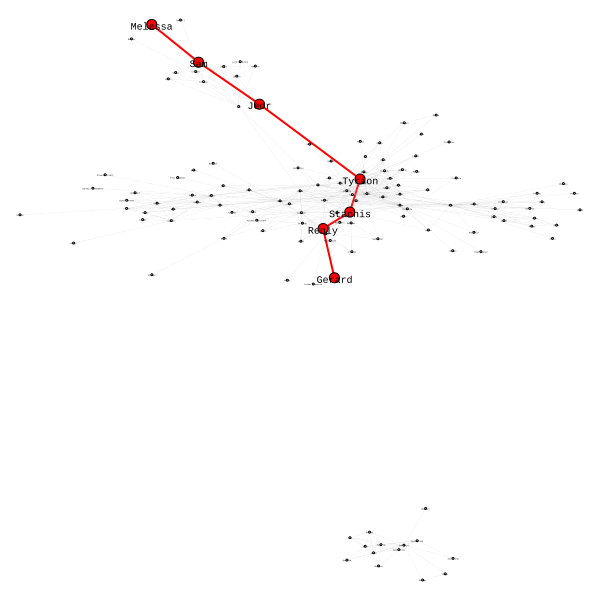

In [17]:
import networkx as nx
import igraph as ig

# Calculate the diameter path using igraph
d = g.get_diameter()

# GET NODES IN THE DIAMETER PATH
diameter_path = d

# GET EDGES IN THE DIAMETER PATH
diameter_edges = g.get_eids(pairs=[(d[i], d[i+1]) for i in range(len(d)-1)], directed=False)

# Visual style for plotting
visual_style = {
    "vertex_color": ["red" if node.index in diameter_path else "white" for node in g.vs],
    "edge_color": ["red" if edge.index in diameter_edges else "grey" for edge in g.es],
    "edge_width": [2 if edge.index in diameter_edges else 0.1 for edge in g.es],
    "vertex_label": [node["Label"] for node in g.vs],
    "vertex_size": [10 if node.index in diameter_path else 2 for node in g.vs],
    "vertex_label_size": [10 if node.index in diameter_path else 2 for node in g.vs]

}

print("Path between most distant nodes:", [g.vs[index]["Label"] for index in diameter_path])



# Plot the graph
ig.plot(g, **visual_style)


### Shortest Paths

Shortest paths between Daenerys and other nodes [['Daenerys'], ['Daenerys', 'Jorah'], ['Daenerys', 'Xaro'], ['Daenerys', 'Spice King'], ['Daenerys', 'Kovarro'], ['Daenerys', 'Pyatt Pree'], ['Daenerys', 'Doreah'], ['Daenerys', 'Quaithe'], ['Daenerys', 'Irri'], ['Daenerys', 'Rakharo'], ['Daenerys', 'Drogo'], ['Daenerys', 'Rhaego'], ['Daenerys', 'Silk King'], ['Daenerys', 'Malakko']]


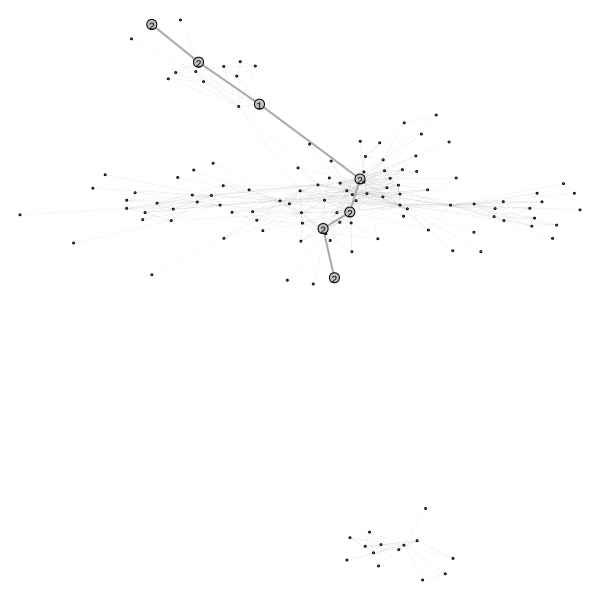

In [18]:
# SHORTEST PATHS
shortest_paths = {}
for node in nodes:
    shortest_paths[node["Label"]]=[nodes[v]["Label"] for v in g.get_all_shortest_paths(node)
                                                    ]
# SHOW DISTANCES OF SHORTEST PATHS BETWEEN ONE NODE AND EVERYBODY ELSE

node_name = "Daenerys"
print("Shortest paths between", node_name,"and other nodes", shortest_paths[node_name])

distances = [len(path) for path in shortest_paths[node_name]]

visual_style["vertex_color"] = ["pink" if node["Label"]==node_name else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

visual_style["vertex_label"] = distances

ig.plot(g, **visual_style)

In [19]:
sp = dict(nx.shortest_path(G)) #between all nodes
print(sp)

{'CERSEI': {'CERSEI': ['CERSEI'], 'TYRION': ['CERSEI', 'TYRION'], 'SANSA': ['CERSEI', 'SANSA'], 'JOFFREY': ['CERSEI', 'JOFFREY'], 'LITTLEFINGER': ['CERSEI', 'LITTLEFINGER'], 'TOMMEN': ['CERSEI', 'TOMMEN'], 'LANCEL': ['CERSEI', 'LANCEL'], 'SHAE': ['CERSEI', 'SHAE'], 'PYCELLE': ['CERSEI', 'PYCELLE'], 'TYWIN': ['CERSEI', 'TYWIN'], 'JAIME': ['CERSEI', 'JAIME'], 'MYRCELLA': ['CERSEI', 'MYRCELLA'], 'JANOS': ['CERSEI', 'JANOS'], 'VARYS': ['CERSEI', 'VARYS'], 'ALTON': ['CERSEI', 'ALTON'], 'ARYA': ['CERSEI', 'ARYA'], 'HOUND': ['CERSEI', 'HOUND'], 'NED': ['CERSEI', 'NED'], 'ROBERT': ['CERSEI', 'ROBERT'], 'LORAS': ['CERSEI', 'LORAS'], 'STANNIS': ['CERSEI', 'STANNIS'], 'PODRICK': ['CERSEI', 'PODRICK'], 'ROBB': ['CERSEI', 'ROBB'], 'ILYN_PAYNE': ['CERSEI', 'ILYN_PAYNE'], 'MANDON': ['CERSEI', 'MANDON'], 'MERYN_TRANT': ['CERSEI', 'MERYN_TRANT'], 'BRONN': ['CERSEI', 'BRONN'], 'DAVOS': ['CERSEI', 'DAVOS'], 'HAYLENE': ['CERSEI', 'HAYLENE'], 'JOANNA': ['CERSEI', 'JOANNA'], 'MATTHOS': ['CERSEI', 'MATTHOS']

<class 'networkx.utils.decorators.argmap'> compilation 63:3: FutureWarning: 

shortest_path will return an iterator that yields
(node, path) pairs instead of a dictionary when source
and target are unspecified beginning in version 3.5

To keep the current behavior, use:

	dict(nx.shortest_path(G))


In [20]:
i = 0
for _, v in sp.items():
  for char, dic in v.items():
    if len(dic) == len(diameter_path):
      i = i+1

print("The number of the shortest path long as the diameter are", i)

The number of the shortest path long as the diameter are 36


In [21]:
# AVERAGE PATH LENGTH - HOW CLOSE ARE THE NODES TO EACH OTHER ON AVERAGE
print("Average path length:", g.average_path_length(directed=False))

# Check if G is connected (for NetworkX)
if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
else:
    # Extract the largest connected component
    largest_cc = max(nx.connected_components(G), key=len)
    subgraph = G.subgraph(largest_cc)
    avg_shortest_path = nx.average_shortest_path_length(subgraph)

print("Average shortest path length:", avg_shortest_path)

Average path length: 2.8400541679205538
Average shortest path length: 2.8573607932875666


### Node Degrees

In [22]:
# CONNECTIVITY - HOW WELL CONNECTED A NODE IS

def sum_neigh_degree(graph): # compute the sum of neighbors' degrees
    data = {}
    for node in graph.vs:
        neighbors = graph.neighbors(node, mode="all")
        neighbors_degrees = [graph.degree(neigh) for neigh in neighbors]
        data[node.index] = sum(neighbors_degrees) / len(neighbors_degrees) if neighbors_degrees else 0
    return data


print("Node degrees:"),

# Compute the average degree of each node’s neighbors
sum_neigh_degree = sum_neigh_degree(g)

# Prepare data for DataFrame
degree = [v.degree() for v in g.vs]
average_neigh_degree = [sum_neigh_degree[v.index] for v in g.vs]

degree_df = pd.DataFrame({
    'Node': g.vs["Label"],
    'Degree': degree,
    "Average degree of node's neighbours": average_neigh_degree
})

degree_df = degree_df.sort_values(by=['Degree'], ascending=False)

# Print results
print("First 10 nodes with highest degree")
print(degree_df.head(10))
print("\n")
print("Last 5 nodes with lowest degree")
print(degree_df.tail(5))



Node degrees:
First 10 nodes with highest degree
       Node  Degree  Average degree of node's neighbours
20  Joffrey      36                            14.361111
1    Tyrion      33                            13.818182
0    Cersei      31                            14.838710
10     Robb      28                            13.928571
4      Arya      27                            12.037037
12    Tywin      25                            15.160000
18  Catelyn      23                            15.391304
7   Stannis      22                            17.136364
78      Ned      20                            18.400000
16    Theon      20                            10.200000


Last 5 nodes with lowest degree
               Node  Degree  Average degree of node's neighbours
107          Portan       1                                 10.0
94           Gerard       1                                 13.0
93   Drowned Priest       1                                 20.0
76          Rakharo       1   

In [23]:
dmax = max(degree_df['Degree'])
print(f'maximum degree: {dmax}')
dmin = min(degree_df['Degree'])
print(f'minimum degree: {dmin}')
davg = np.mean(degree_df['Degree'])
print(f'average degree: {davg}')
dmostfreq = list(dict(degree_df['Degree'].value_counts()).items())[0]
print(f'most frequent degree (mode): {dmostfreq[0]} with {dmostfreq[1]} nodes')

maximum degree: 36
minimum degree: 1
average degree: 7.534883720930233
most frequent degree (mode): 1 with 23 nodes


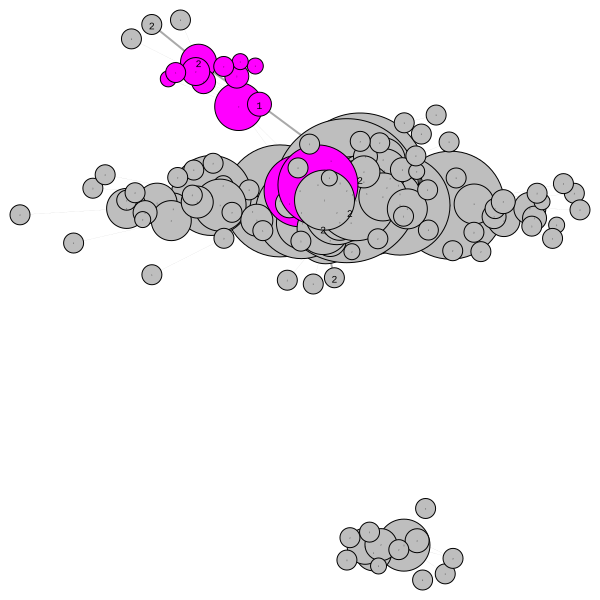

In [24]:
#SET SIZE PROP TO DEGREE
visual_style["vertex_size"] = [4*degree if degree>3 else 20 for degree in g.degree()]

#COLOR NEAREST NEIGHBORS OF A CERTAIN NODE
node_name = "Jon"
for node in nodes:
    if node["Label"] == node_name:
        node_index = node.index

neighbors = g.neighborhood(nodes[node_index],order=1)
visual_style["vertex_color"] = ["fuchsia" if node.index in neighbors else "grey" for node in nodes]
visual_style["edge_color"] = "darkgrey"

ig.plot(g, **visual_style)

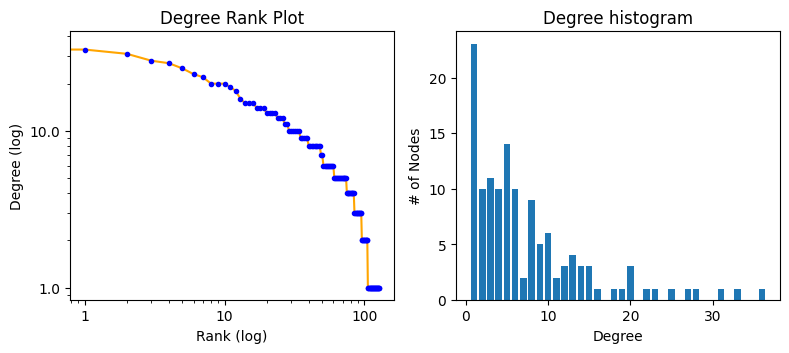

In [25]:
from matplotlib.ticker import ScalarFormatter


fig = plt.figure("Degree ", figsize=(8, 8))

axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[3:, :2])
# Plot the line in orange
ax0.plot(sorted(degree_df['Degree'], reverse=True), "orange")
# Plot the dots in blue
ax0.plot(sorted(degree_df['Degree'], reverse=True), "bo", markersize=3)
ax0.set_title("Degree Rank Plot")
ax0.set_ylabel("Degree (log)")
ax0.set_xlabel("Rank (log)")
ax0.set_xscale('log')
ax0.set_yscale('log')

ax0.xaxis.set_major_formatter(ScalarFormatter())
ax0.yaxis.set_major_formatter(ScalarFormatter())

ax1 = fig.add_subplot(axgrid[3:, 2:])
unique, counts = np.unique(degree_df['Degree'], return_counts=True)
ax1.bar(unique, counts)
ax1.set_title("Degree histogram")
ax1.set_xlabel("Degree")
ax1.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()


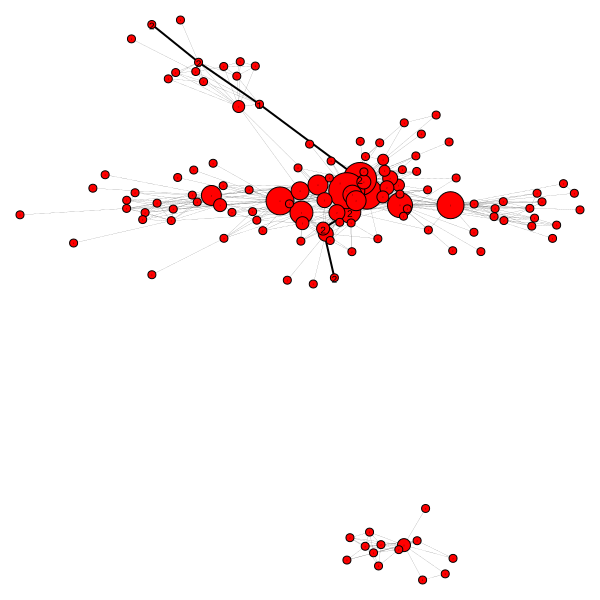

In [26]:
visual_style["vertex_size"] = [degree if degree>10 else 8 for degree in g.degree()]
visual_style['edge_color'] = 'black'
visual_style['vertex_color'] = 'red'
ig.plot(g, **visual_style)

### Bridges

An edge is a bridge if its removal increases the number of (weakly) connected components in the graph.

In [27]:
bridges = g.bridges()

if bridges:
    print("The network has bridges.")
    bridge_labels = [(g.vs[g.es[bridge].source]["Label"], g.vs[g.es[bridge].target]["Label"]) for bridge in bridges]
    print("The bridges are:", bridge_labels)
else:
    print("The network doesn't have any bridges")

print("Number of bridges:", len(bridges))

The network has bridges.
The bridges are: [('Cersei', 'Joanna'), ('Tyrion', 'Lysa'), ('Tyrion', 'Protester'), ('Daenerys', 'Rakharo'), ('Arya', 'Aegon'), ('Arya', 'Syrio'), ('Davos', 'Father Seaworth'), ('Davos', 'Marya'), ('Robb', 'Quent'), ('Robb', 'Frey Daughter'), ('Robb', 'Rennick'), ('Tywin', 'Harren'), ('Theon', "Captain's Daughter"), ('Theon', 'Drowned Priest'), ('Joffrey', 'Boros'), ('Luwin', 'Portan'), ('Renly', 'Gerard'), ('Sam', 'Melessa'), ('Sam', 'Randyll'), ('Roose', 'Ramsay'), ('Rickon', 'Billy'), ('Craster', 'Benjen'), ('Myrcella', 'High Septon')]
Number of bridges: 23


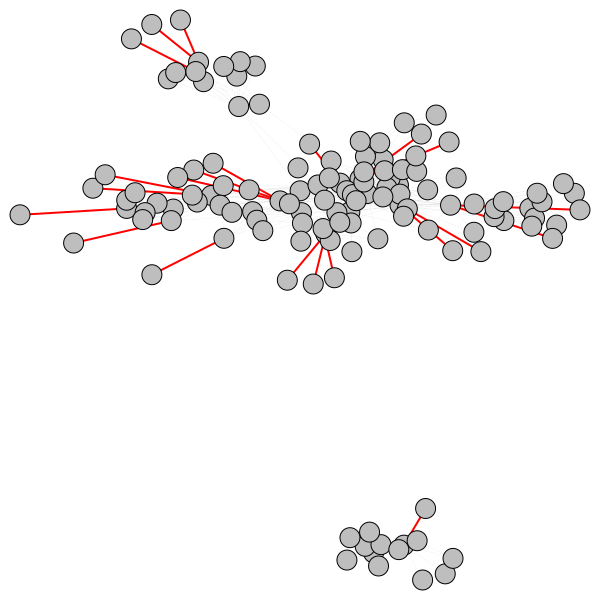

In [28]:
visual_style = {}

bridges_index = g.bridges()

visual_style["vertex_color"] = 'grey'
visual_style["edge_color"] = ["red" if edge.index in bridges_index else "grey" for edge in edges]
#visual_style["vertex_label"] = [g.vs[edge.source]["Label"] for edge in edges]
visual_style["edge_width"] = [2 if edge.index in bridges_index else 0.1 for edge in edges]
#visual_style["vertex_label_size"] = [10 if edge.index in bridges_index else 2 for edge in edges]

ig.plot(g, **visual_style)

### Giant Components



In [29]:
clusters = g.connected_components()
clusters = sorted(clusters, key=len, reverse=True)

# Get the largest connected component
largest_cc = clusters[0]
G0 = g.subgraph(largest_cc)

# Check if the original graph is isomorphic to the largest connected component
if g.isomorphic(G0):
    print("This network is connected and there are no isolated nodes")
else:
    print("This network has", len(clusters), "components")

This network has 2 components


### Centrality

In [30]:
# Degree Centrality
degree_cen = nx.degree_centrality(G)

# Weighted degree centrality
weighted_degree_cen = {node: sum(weight for _, _, weight in G.edges(node, data='Weight')) for node in G.nodes()}
# Normalize the weighted degree centrality
max_weighted_degree = max(weighted_degree_cen.values())
weighted_degree_cen = {node: centrality / max_weighted_degree for node, centrality in weighted_degree_cen.items()}

clo_cen = nx.closeness_centrality(G)
bet_cen = nx.betweenness_centrality(G)
eig_cen = nx.eigenvector_centrality(G)
har_cen = nx.harmonic_centrality(G)
pagerank_cen = nx.pagerank(G)

centrality_df = pd.DataFrame(data={
    'Node': list(bet_cen.keys()),
    'Betweenness centrality': list(bet_cen.values()),
    'Closeness centrality': list(clo_cen.values()),
    'Eigenvector centrality': list(eig_cen.values()),
    'Harmonic centrality': [1/x for x in har_cen.values()],
    'Degree centrality': list(degree_cen.values()),
    'Weighted degree centrality': list(weighted_degree_cen.values()),
    'PageRank centrality': list(pagerank_cen.values())
})

centrality_df



Node  Betweenness centrality  Closeness centrality  \
0       CERSEI                0.061160              0.447274   
1       TYRION                0.141080              0.476673   
2     DAENERYS                0.005167              0.101562   
3        JORAH                0.000492              0.077665   
4         ARYA                0.151042              0.430217   
..         ...                     ...                   ...   
124   TRYSTANE                0.000000              0.313368   
125  PROTESTER                0.000000              0.311446   
126     RAMSAY                0.000000              0.234483   
127    RANDYLL                0.000000              0.206364   
128    RENNICK                0.000000              0.300388   

     Eigenvector centrality  Harmonic centrality  Degree centrality  \
0              2.829800e-01             0.020270           0.242188   
1              2.773225e-01             0.022405           0.257812   
2              5.139970e-07             0.029098           0.101562   
3              4.665858e-07             0.032573           0.070312   
4              1.667488e-01             0.024262           0.210938   
..                      ...                  ...                ...   
124            2.407172e-02             0.125000           0.015625   
125            1.754290e-02             0.105263           0.007812   
126            2.059025e-03             0.015605           0.007812   
127            2.493116e-04             0.016107           0.007812   
128            1.314364e-02             0.034682           0.007812   

     Weighted degree centrality  PageRank centrality  
0                      0.571875             0.025062  
1                      1.000000             0.028265  
2                      0.398958             0.019100  
3                      0.190625             0.012055  
4                      0.501042             0.027389  
..                          ...                  ...  
124                    0.004167             0.002731  
125                    0.002083             0.001891  
126                    0.002083             0.002225  
127                    0.002083             0.002440  
128                    0.002083             0.001958  

[129 rows x 8 columns]

In [31]:
print("Mean values of Centralities:")
print("Betweenness:", np.mean(list(bet_cen.values())))
print("Closeness:", np.mean(list(clo_cen.values())))
print("Eigenvector:", np.mean(list(eig_cen.values())))
print("Harmonic:", 1/np.mean(list(har_cen.values())))
print("Degree:", np.mean(list(degree_cen.values())))
print("Weighted Degree:", np.mean(list(weighted_degree_cen.values())))
print("PageRank:", np.mean(list(pagerank_cen.values())))

Mean values of Centralities:
Betweenness: 0.011663195080266128
Closeness: 0.2938768721568702
Eigenvector: 0.05432844793503128
Harmonic: 0.02373097536148345
Degree: 0.05886627906976744
Weighted Degree: 0.09958010335917312
PageRank: 0.007751937984496124


In [32]:
def highest_centrality(centrality_dict):
    # Sort items by centrality score in descending order and return the top one
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[0]

def k_highest_centrality(centrality_dict, k):
    # Sort items by centrality score in descending order and return the top k
    cent_items = sorted(centrality_dict.items(), key=lambda item: item[1], reverse=True)
    return cent_items[:k]

In [33]:
highest_centrality_clo_cen = k_highest_centrality(clo_cen, 5)
clo_cen_char, clo_cen_scores = zip(*highest_centrality_clo_cen)

highest_centrality_bet_cen = k_highest_centrality(bet_cen, 5)
bet_cen_char, bet_cen_scores = zip(*highest_centrality_bet_cen)

highest_centrality_eig_cen = k_highest_centrality(eig_cen, 5)
eig_cen_char, eig_cen_scores = zip(*highest_centrality_eig_cen)

highest_centrality_har_cen = k_highest_centrality(har_cen, 5)
har_cen_char, har_cen_scores = zip(*highest_centrality_har_cen)

highest_centrality_degree_cen = k_highest_centrality(degree_cen, 5)
degree_cen_char, degree_cen_scores = zip(*highest_centrality_degree_cen)

highest_centrality_weighted_degree_cen = k_highest_centrality(weighted_degree_cen, 5)
weighted_degree_cen_char, weighted_degree_cen_scores = zip(*highest_centrality_weighted_degree_cen)

highest_centrality_pagerank_cen = k_highest_centrality(pagerank_cen, 5)
pagerank_cen_char, pagerank_cen_scores = zip(*highest_centrality_pagerank_cen)

# Update the DataFrame to display the top 5 most central nodes for each measure correctly
centrality_df = pd.DataFrame(data={
    'Most central character - Betweenness': bet_cen_char,
    'Score - Betweenness': bet_cen_scores,
    'Most central character - Closeness': clo_cen_char,
    'Score - Closeness': clo_cen_scores,
    'Most central character - Eigenvector': eig_cen_char,
    'Score - Eigenvector': eig_cen_scores,
    'Most central character - Harmonic': har_cen_char,
    'Score - Harmonic': [1/x for x in har_cen_scores],
    'Most central character - Degree': degree_cen_char,
    'Score - Degree': degree_cen_scores,
    'Most central character - Weighted Degree': weighted_degree_cen_char,
    'Score - Weighted Degree': weighted_degree_cen_scores,
    'Most central character - PageRank': pagerank_cen_char,
    'Score - PageRank': pagerank_cen_scores
})


centrality_df

Most central character - Betweenness  Score - Betweenness  \
0                                 ARYA             0.151042   
1                               TYRION             0.141080   
2                                 ROBB             0.117047   
3                                  JON             0.110878   
4                                  NED             0.104314   

  Most central character - Closeness  Score - Closeness  \
0                             TYRION           0.476673   
1                            JOFFREY           0.476673   
2                                NED           0.461506   
3                               ROBB           0.451250   
4                             CERSEI           0.447274   

  Most central character - Eigenvector  Score - Eigenvector  \
0                              JOFFREY             0.313306   
1                               CERSEI             0.282980   
2                               TYRION             0.277323   
3                              STANNIS             0.222284   
4                                TYWIN             0.215730   

  Most central character - Harmonic  Score - Harmonic  \
0                           JOFFREY          0.013937   
1                            TYRION          0.014184   
2                            CERSEI          0.014724   
3                              ROBB          0.014907   
4                              ARYA          0.015385   

  Most central character - Degree  Score - Degree  \
0                         JOFFREY        0.281250   
1                          TYRION        0.257812   
2                          CERSEI        0.242188   
3                            ROBB        0.218750   
4                            ARYA        0.210938   

  Most central character - Weighted Degree  Score - Weighted Degree  \
0                                   TYRION                 1.000000   
1                                   CERSEI                 0.571875   
2                                     ARYA                 0.501042   
3                                    THEON                 0.465625   
4                                  JOFFREY                 0.442708   

  Most central character - PageRank  Score - PageRank  
0                           JOFFREY          0.029362  
1                            TYRION          0.028265  
2                              ARYA          0.027389  
3                              ROBB          0.026184  
4                            CERSEI          0.025062

### Homophily

In [34]:
#Compute degree assortativity of graph.
#Assortativity measures the similarity of connections in the graph with respect to the node degree.
#This is the same as degree_assortativity_coefficient but uses the potentially faster scipy.stats.pearsonr function.
assortativity_coefficient = nx.degree_assortativity_coefficient(G, weight="Weight")
print("Degree assortativity coefficient:",nx.degree_pearson_correlation_coefficient(G,weight="Weight"))

Degree assortativity coefficient: -0.08660580606206485


In [35]:
#jaccard similarity between all couples of nodes
preds = nx.jaccard_coefficient(G, G.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

jaccard_coefficient = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

jaccard_coefficient = jaccard_coefficient.sort_values("Score", ascending=False)
jaccard_coefficient

First node        Second node     Score
78       JORAH               XARO  0.800000
281       XARO            KOVARRO  0.700000
77       JORAH            KOVARRO  0.700000
467     DOREAH               IRRI  0.666667
2       CERSEI            JOFFREY  0.634146
..         ...                ...       ...
446     RICKON              BILLY  0.000000
250      THEON  CAPTAINS_DAUGHTER  0.000000
124      DAVOS    FATHER_SEAWORTH  0.000000
127      DAVOS              MARYA  0.000000
108       ARYA        SYRIO_FOREL  0.000000

[486 rows x 3 columns]

### Triangles

In [36]:
#list of all traingles
triangles_list = [(n,nbr,nbr2) for n in G for nbr, nbr2 in itertools.combinations(G[n],2) if nbr in G[nbr2]]
print("List of all the edges involved in the traingles")
triangles_list[:30]

List of all the edges involved in the traingles


[('CERSEI', 'TYRION', 'SANSA'),
 ('CERSEI', 'TYRION', 'JOFFREY'),
 ('CERSEI', 'TYRION', 'LITTLEFINGER'),
 ('CERSEI', 'TYRION', 'TOMMEN'),
 ('CERSEI', 'TYRION', 'LANCEL'),
 ('CERSEI', 'TYRION', 'SHAE'),
 ('CERSEI', 'TYRION', 'PYCELLE'),
 ('CERSEI', 'TYRION', 'TYWIN'),
 ('CERSEI', 'TYRION', 'JAIME'),
 ('CERSEI', 'TYRION', 'MYRCELLA'),
 ('CERSEI', 'TYRION', 'JANOS'),
 ('CERSEI', 'TYRION', 'VARYS'),
 ('CERSEI', 'TYRION', 'ALTON'),
 ('CERSEI', 'TYRION', 'ARYA'),
 ('CERSEI', 'TYRION', 'HOUND'),
 ('CERSEI', 'TYRION', 'NED'),
 ('CERSEI', 'TYRION', 'ROBERT'),
 ('CERSEI', 'TYRION', 'LORAS'),
 ('CERSEI', 'TYRION', 'STANNIS'),
 ('CERSEI', 'TYRION', 'PODRICK'),
 ('CERSEI', 'TYRION', 'MANDON'),
 ('CERSEI', 'TYRION', 'MERYN_TRANT'),
 ('CERSEI', 'TYRION', 'BRONN'),
 ('CERSEI', 'TYRION', 'HAYLENE'),
 ('CERSEI', 'SANSA', 'JOFFREY'),
 ('CERSEI', 'SANSA', 'LITTLEFINGER'),
 ('CERSEI', 'SANSA', 'TOMMEN'),
 ('CERSEI', 'SANSA', 'LANCEL'),
 ('CERSEI', 'SANSA', 'SHAE'),
 ('CERSEI', 'SANSA', 'TYWIN')]

In [37]:
#number of triangles per character, sorted by value in descendent order

triangles_frequency = pd.DataFrame(data = list(zip(nx.triangles(G).keys(), nx.triangles(G).values())),
                             columns = ['Character', '# of triangles in which they are involved'])

triangles_frequency = triangles_frequency.sort_values("# of triangles in which they are involved", ascending=False)
triangles_frequency.head(10)

Character  # of triangles in which they are involved
20       JOFFREY                                        176
0         CERSEI                                        151
1         TYRION                                        141
7        STANNIS                                        100
10          ROBB                                         92
12         TYWIN                                         89
49  LITTLEFINGER                                         88
18       CATELYN                                         84
22         SANSA                                         80
78           NED                                         70

In [38]:
#total number of triangles
print("There are", int(np.sum(list(nx.triangles(G).values())) / 3), "triangles")

There are 900 triangles


Investigating interesting character triangles

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import igraph as ig

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [70] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Find all triangles in the graph
triangles = [list(triangle) for triangle in nx.enumerate_all_cliques(G) if len(triangle) == 3]

# Compute the strengths and max edge weights of all triangles
triangle_strengths_and_max_edges = []
for triangle in triangles:
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

# Sort triangles by strength in descending order and select the top 10
top_triangles = sorted(triangle_strengths_and_max_edges, key=lambda x: x[1], reverse=True)[:30]

# Highlight the nodes and edges in the top 10 triangles
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    color = "Crimson"  # Use a single color for all top triangles or set a different color if needed
    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 100  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the top 10 triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in top_triangles:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 30))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=30,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Triangle ['CERSEI', 'TYRION', 'JOFFREY'] has strength 306, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 'SHAE'] has strength 293, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 'VARYS'] has strength 291, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 'SANSA'] has strength 275, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 'BRONN'] has strength 266, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 'PYCELLE'] has strength 243, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 'LANCEL'] has strength 238, the highest edge strength is 177, and the strongest edge is ('CERSEI', 'TYRION')
Triangle ['CERSEI', 'TYRION', 

In [ ]:
highlighted_triangles = [
    (('JON', 'YGRITTE', 'QHORIN'), "Cyan"),
    (('CERSEI', 'TYRION', 'JOFFREY'), "Red"),
    (('CERSEI', 'TYRION', 'VARYS'), "Blue"),
    (('CERSEI', 'JOFFREY', 'SANSA'), "Yellow"),
    (('TYRION', 'SHAE', 'BRONN'), "Orange"),
    (('CERSEI', 'TYRION', 'BRONN'), "Green"),
    (('ROBB', 'CATELYN', 'JAMIE'), "LimeGreen"),
    (('CATELYN', 'BRIENNE', 'JAMIE'), "HotPink"),
    (('CATELYN', 'BRIENNE', 'RENLY'), "LightBlue"),
    (('DAENERYS', 'JORAH', 'XARO'), "Gold"),
    (('ARYA', 'JAQEN', 'GENDRY'), "Crimson")
]

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Define default color for nodes and edges
default_node_color = "lightgrey"
default_edge_color = "grey"

# Initialize node colors and sizes
node_colors = [default_node_color] * len(G.nodes())
node_sizes = [30] * len(G.nodes())

# Initialize edge colors and widths
edge_colors = [default_edge_color] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Convert edges to sets for efficient lookup
edges_set = set(map(frozenset, G.edges()))

# Function to compute the strength of a triangle and the maximum edge weight
def compute_triangle_strength_and_max_edge(triangle, graph):
    nodes = list(triangle)
    strength = 0
    max_edge_weight = 0
    max_edge = None
    for i in range(3):
        for j in range(i + 1, 3):
            edge = (nodes[i], nodes[j]) if (nodes[i], nodes[j]) in graph.edges() else (nodes[j], nodes[i])
            if edge in graph.edges():
                edge_weight = graph[edge[0]][edge[1]]['Weight']
                strength += edge_weight
                if edge_weight > max_edge_weight:
                    max_edge_weight = edge_weight
                    max_edge = edge
    return strength, max_edge_weight, max_edge

# Highlight the nodes and edges in the triangles and compute strengths and max edge weights
triangle_strengths_and_max_edges = []
for idx, (triangle, color) in enumerate(highlighted_triangles):
    strength, max_edge_weight, max_edge = compute_triangle_strength_and_max_edge(triangle, G)
    triangle_strengths_and_max_edges.append((triangle, strength, max_edge_weight, max_edge))

    for node in triangle:
        if node in G.nodes():
            node_index = list(G.nodes()).index(node)
            node_colors[node_index] = color  # Node color based on triangle color
            node_sizes[node_index] = 40  # Larger size for highlighted nodes

    for i in range(3):
        for j in range(i + 1, 3):
            edge = (triangle[i], triangle[j]) if (triangle[i], triangle[j]) in G.edges() else (triangle[j], triangle[i])
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
                edge_colors[edge_index] = color  # Edge color based on triangle color
                edge_widths[edge_index] = 5  # Thicker edge for edges in triangles

# Print the strengths of the triangles, the highest edge weights, and the names of the edges
for triangle, strength, max_edge_weight, max_edge in triangle_strengths_and_max_edges:
    print(f"Triangle {triangle} has strength {strength}, the highest edge strength is {max_edge_weight}, and the strongest edge is {max_edge}")

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"]) - 0.05, max(g.vs["x"]) + 0.05)
ax.set_ylim(min(g.vs["y"]) - 0.05, max(g.vs["y"]) + 0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()


Specifically about a character

In [ ]:
highlight_node = "ARYA"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

In [ ]:
highlight_node = "LITTLEFINGER"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

In [ ]:
highlight_node = "TYRION"  # replace this with the actual node identifier

def find_triangles_with_node(G, node):
    triangles = []
    for n in G:
        neighbors = list(G.neighbors(n))
        for nbr, nbr2 in itertools.combinations(neighbors, 2):
            if G.has_edge(nbr, nbr2) and node in (n, nbr, nbr2):
                triangles.append((n, nbr, nbr2))
    return triangles

# Compute positions using spring layout
community_graph_layout_gn = nx.spring_layout(G)

# Prepare colors for nodes and edges
node_colors = []
edge_colors = []
for node in G.nodes():
    if node == highlight_node:
        node_colors.append("green")  # Highlight TYRION node
    else:
        node_colors.append("lightgrey")

# Initialize edge colors and widths
edge_colors = ["grey"] * len(G.edges())
edge_widths = [1] * len(G.edges())

# Find triangles involving TYRION
highlighted_triangles = find_triangles_with_node(G, highlight_node)

# Highlight edges in triangles involving TYRION
for triangle in highlighted_triangles:
    triangle_edges = [
        (triangle[0], triangle[1]),
        (triangle[1], triangle[2]),
        (triangle[2], triangle[0])
    ]
    for edge in triangle_edges:
        try:
            if edge in G.edges():
                edge_index = list(G.edges()).index(edge)
            elif (edge[1], edge[0]) in G.edges():
                edge_index = list(G.edges()).index((edge[1], edge[0]))
            else:
                continue  # Skip if edge not found in G.edges()

            edge_colors[edge_index] = "red"  # Color edges in triangles with red
            edge_widths[edge_index] = 3  # Thicker width for edges in triangles
        except ValueError:
            pass  # Ignore ValueError if edge not found in G.edges()

# Add positions to igraph nodes
g = ig.Graph(directed=False)
g.add_vertices(list(G.nodes()))
g.add_edges(list(G.edges()))
g.vs["x"] = [community_graph_layout_gn[node][0] for node in G.nodes()]
g.vs["y"] = [community_graph_layout_gn[node][1] for node in G.nodes()]
g.vs["Label"] = list(G.nodes())

node_sizes = [20] * len(G.nodes())

# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(20, 15))
ax.set_xlim(min(g.vs["x"]) - 0.1, max(g.vs["x"]) + 0.1)
ax.set_ylim(min(g.vs["y"]) - 0.1, max(g.vs["y"]) + 0.1)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

# Plot the graph with igraph
ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in zip(g.vs["x"], g.vs["y"])],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size=10,
    edge_color=edge_colors,
    edge_width=edge_widths
)

plt.show()

### Clustering Coefficients

GENERAL INDICATION OF THE GRAPH'S TENDENCY TO BE ORGANISED INTO CLUSTERS

If a node has fewer than 2 neighbors, the clustering coefficient is undefined, and the returned value is NaN

In [ ]:
# Global Clustering Coefficient (Triadic Closure) - NUMBER OF CLOSED TRIPLETS/NUMBER OF POSSIBLE TRIPLETS

print("Global clustering coefficient (Triadic Closure)", g.transitivity_undirected())

In [ ]:
# Local Clustering Coefficient - ARE THE NEIGHBOURS OF THE NODES ALSO CONNECTED?
print("Local clustering components:")
local_ccs = g.transitivity_local_undirected()
sum_cc = 0
for local_cc in local_ccs:
    if not math.isnan(local_cc):
        sum_cc += local_cc

for node in nodes:
        print("   Local clustering coefficient of node", node["Label"],":",local_ccs[node.index])

In [ ]:
# Average Clustering Coefficient of the graph:

print("Average clustering component", sum_cc/len(g.vs()))


## Communities

### Infomap

In [ ]:
infomap = g.community_infomap()

In [ ]:
# Creating clusters of characters
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []
cluster_7 = []
cluster_8 = []
cluster_9 = []
cluster_10 = []

infomap_comm = infomap.membership

for i, node in enumerate(G.nodes()):
  if infomap_comm[i] == 0:
    cluster_1.append(node)
  elif infomap_comm[i] == 1:
    cluster_2.append(node)
  elif infomap_comm[i] == 2:
    cluster_3.append(node)
  elif infomap_comm[i] == 3:
    cluster_4.append(node)
  elif infomap_comm[i] == 4:
    cluster_5.append(node)
  elif infomap_comm[i] == 5:
    cluster_6.append(node)
  elif infomap_comm[i] == 6:
    cluster_7.append(node)
  elif infomap_comm[i] == 7:
    cluster_8.append(node)


infomap_comm = [cluster_1, cluster_2, cluster_3, cluster_4, cluster_5, cluster_6, cluster_7, cluster_8]

n_comm_infomap = len(infomap_comm)
print("Number of communities detected:", n_comm_infomap)

In [ ]:
print("List of Characters by Community")
for i, cluster in enumerate(infomap_comm):
    print(f"Cluster {i+1}: {cluster}")

In [ ]:
#community_graph_layout_infomap = nx.spring_layout(G, k=2/np.sqrt(len(G.nodes())))
community_graph_layout_infomap = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan", "Orange"]


node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(infomap_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)

In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,2))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Daenerys")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Harenhall")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="Stannis")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="The Far North")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Riverlands")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Iron Islands and Winterfell")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [ ]:
#modularity = np.round(g.modularity(infomap_comm), 3)
#print("The Modularity for the Infomap Method is",modularity)

modularity_infomap = round(nx.community.modularity(G, infomap_comm),3)
print("The Modularity for the Infomap Method is",modularity_infomap)

### Girvan-Newman

In [ ]:
#compute girvan newman communities
from networkx.algorithms import community
com_gn = community.girvan_newman(G)

# To get the communities at different levels
levels = []
desired_number_of_communities = 5
for communities in com_gn:
    levels.append(communities)
    if len(communities) >= desired_number_of_communities:
        break

# The last entry in levels contains the desired number of communities
g_n_comm = [sorted(list(c)) for c in levels[-1]]
n_comm_g_n = len(g_n_comm)
print("Number of communities detected:", n_comm_g_n)
print("Communities:", g_n_comm)

In [ ]:
# Print each community list
print("List of the characters, divided per communities:")
for idx, community in enumerate(g_n_comm):
    print(f"Cluster {idx + 1}: {community}")

In [ ]:
community_graph_layout_gn = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "LightSalmon", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(g_n_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing, Stannis, Riverlands")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Daenerys")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Harrenhall")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="The Far North")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="The Iron Islands and Winterfell")
ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [ ]:
def convertInLabelArray_communities(G, list_of_communities):
    # Initialize the label array with a default value that indicates no community found
    d = []
    num_communities = len(list_of_communities)

    # Create a dictionary to map each node to its community label
    node_to_community = {}
    for community_label, community in enumerate(list_of_communities):
        for node in community:
            node_to_community[node] = community_label

    # Populate the label array based on the node's community
    for node in G.nodes():
        if node in node_to_community:
            d.append(node_to_community[node])
        else:
            d.append(num_communities)  # Assign a label for nodes not in any community

    d = np.array(d)
    return d

In [ ]:
#modularity
#modularity = np.round(get_modularity(nx.to_numpy_array(G, weight=None), convertInLabelArray_communities(G, next(com))), 3)

modularity_g_n = round(nx.community.modularity(G, next(com_gn)),3)

print("The Modularity for the Girvan-Newman Nethod is", modularity_g_n)

### Louvain

In [ ]:
louvain_comm = nx.community.louvain_communities(G, seed=123)
n_comm_louvain = len(louvain_comm)
print("Number of communities detected:", n_comm_louvain)

In [ ]:
# Convert communities to lists and print each one
print("List of the characters, divided per communities:")
for idx, community in enumerate(louvain_comm):
    print(f"Community {idx + 1}: {community}")

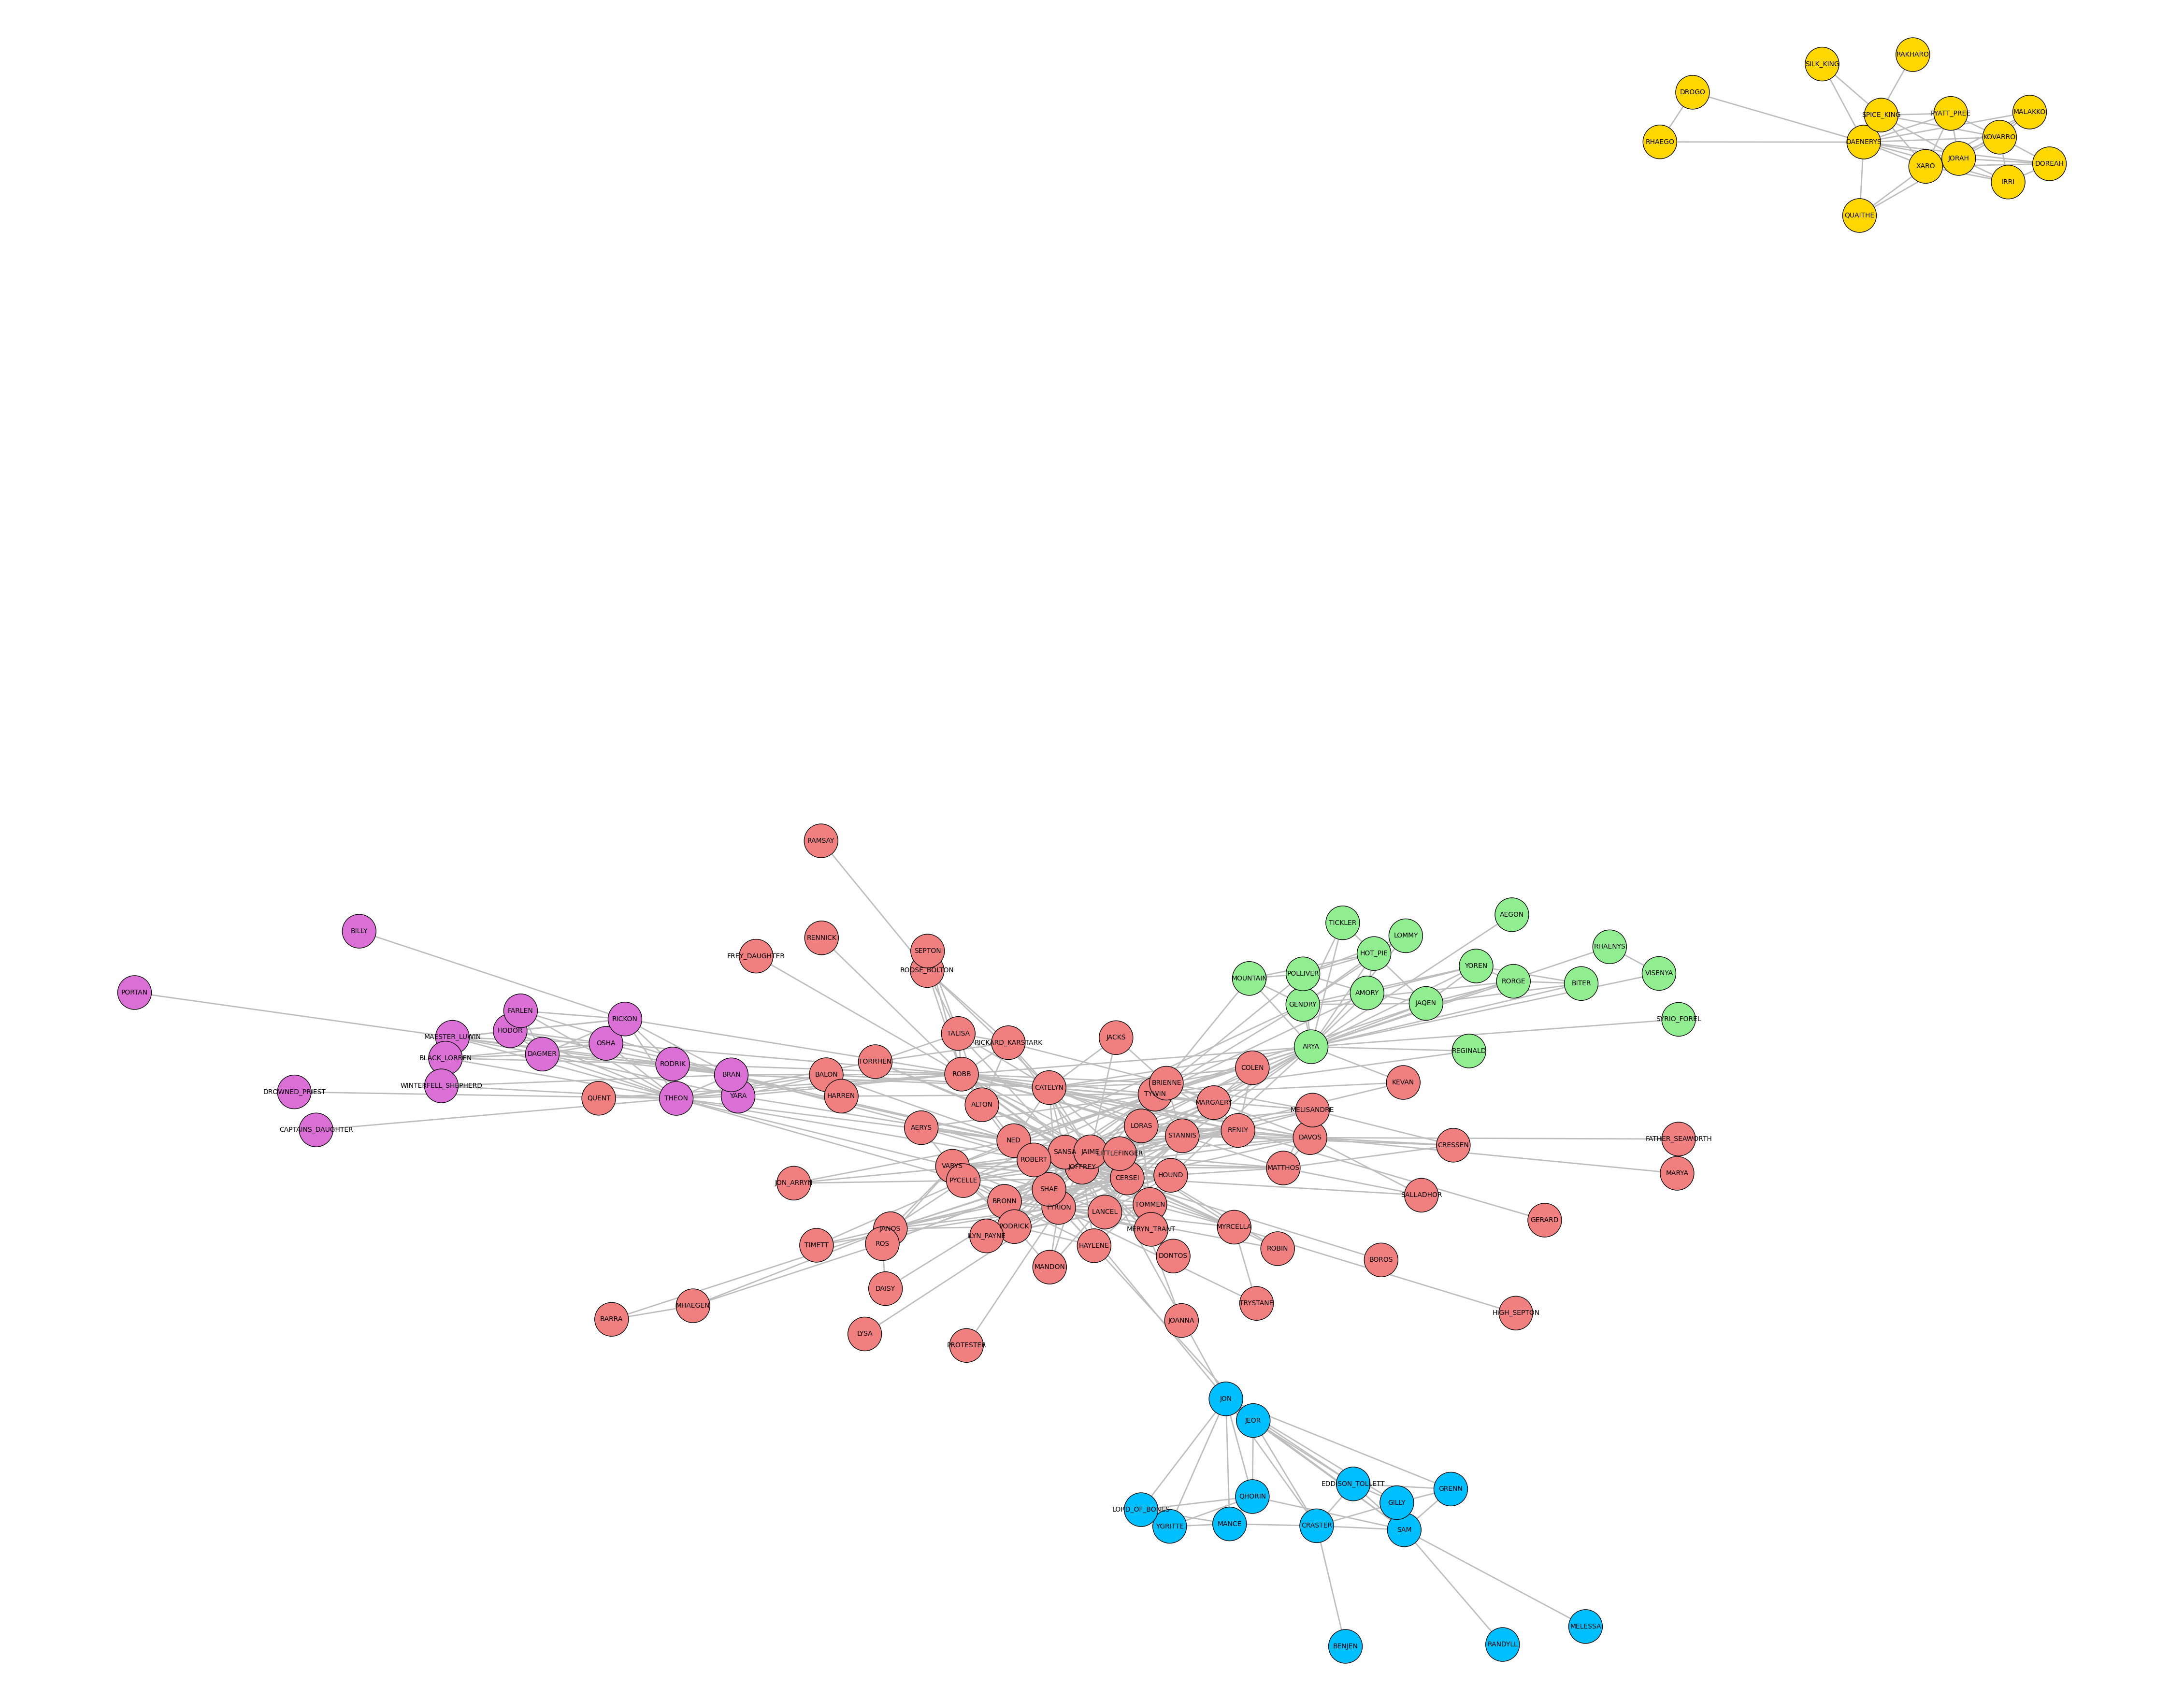

In [ ]:
community_graph_layout_louvain = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(g_n_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gn
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)

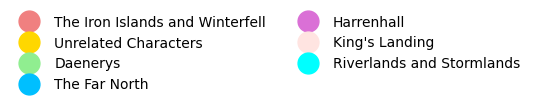

In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="The Iron Islands and Winterfell")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="Unrelated Characters")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Daenerys")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="The Far North")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="Harrenhall")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Cyan", marker='o', markersize=15, linestyle='None', label="Riverlands and Stormlands")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [ ]:
modularity_louvain = round(nx.community.modularity(G, louvain_comm),3)
print("The Modularity for the Louvain Method is",modularity_louvain)

The Modularity for the Louvain Method is 0.563


### Greedy Modularity Maximization

In [ ]:
gmm_comm = nx.community.greedy_modularity_communities(G)
n_comm_gmm = len(gmm_comm)
print("The number of communities detected are:",n_comm_gmm)

The number of communities detected are: 6


In [ ]:
print("List of the characters, divided per communities:")
for idx, community in enumerate(gmm_comm):
    print(f"Cluster {idx + 1}: {community}")

List of the characters, divided per communities:
Cluster 1: frozenset({'JANOS', 'HARREN', 'HIGH_SEPTON', 'HAYLENE', 'PODRICK', 'TOMMEN', 'DAISY', 'STANNIS', 'AERYS', 'ROBERT', 'ROBIN', 'ILYN_PAYNE', 'JON_ARRYN', 'TRYSTANE', 'LITTLEFINGER', 'JOANNA', 'VARYS', 'BARRA', 'BRONN', 'MATTHOS', 'PROTESTER', 'MANDON', 'LYSA', 'MYRCELLA', 'MERYN_TRANT', 'TYRION', 'BOROS', 'CERSEI', 'PYCELLE', 'LANCEL', 'LORAS', 'JOFFREY', 'HOUND', 'SALLADHOR', 'DONTOS', 'NED', 'ROS', 'JAIME', 'TYWIN', 'SANSA', 'TIMETT', 'MHAEGEN', 'SHAE'})
Cluster 2: frozenset({'FATHER_SEAWORTH', 'TALISA', 'CRESSEN', 'JACKS', 'SEPTON', 'TORRHEN', 'MARYA', 'MELISANDRE', 'FREY_DAUGHTER', 'GERARD', 'RENNICK', 'CATELYN', 'ROBB', 'MARGAERY', 'BALON', 'YARA', 'DAVOS', 'COLEN', 'ALTON', 'RICKARD_KARSTARK', 'BRIENNE', 'ROOSE_BOLTON', 'RENLY', 'RAMSAY', 'QUENT'})
Cluster 3: frozenset({'REGINALD', 'RHAENYS', 'KEVAN', 'GENDRY', 'JAQEN', 'POLLIVER', 'VISENYA', 'ARYA', 'TICKLER', 'MOUNTAIN', 'HOT_PIE', 'BITER', 'AEGON', 'SYRIO_FOREL', 'AMORY

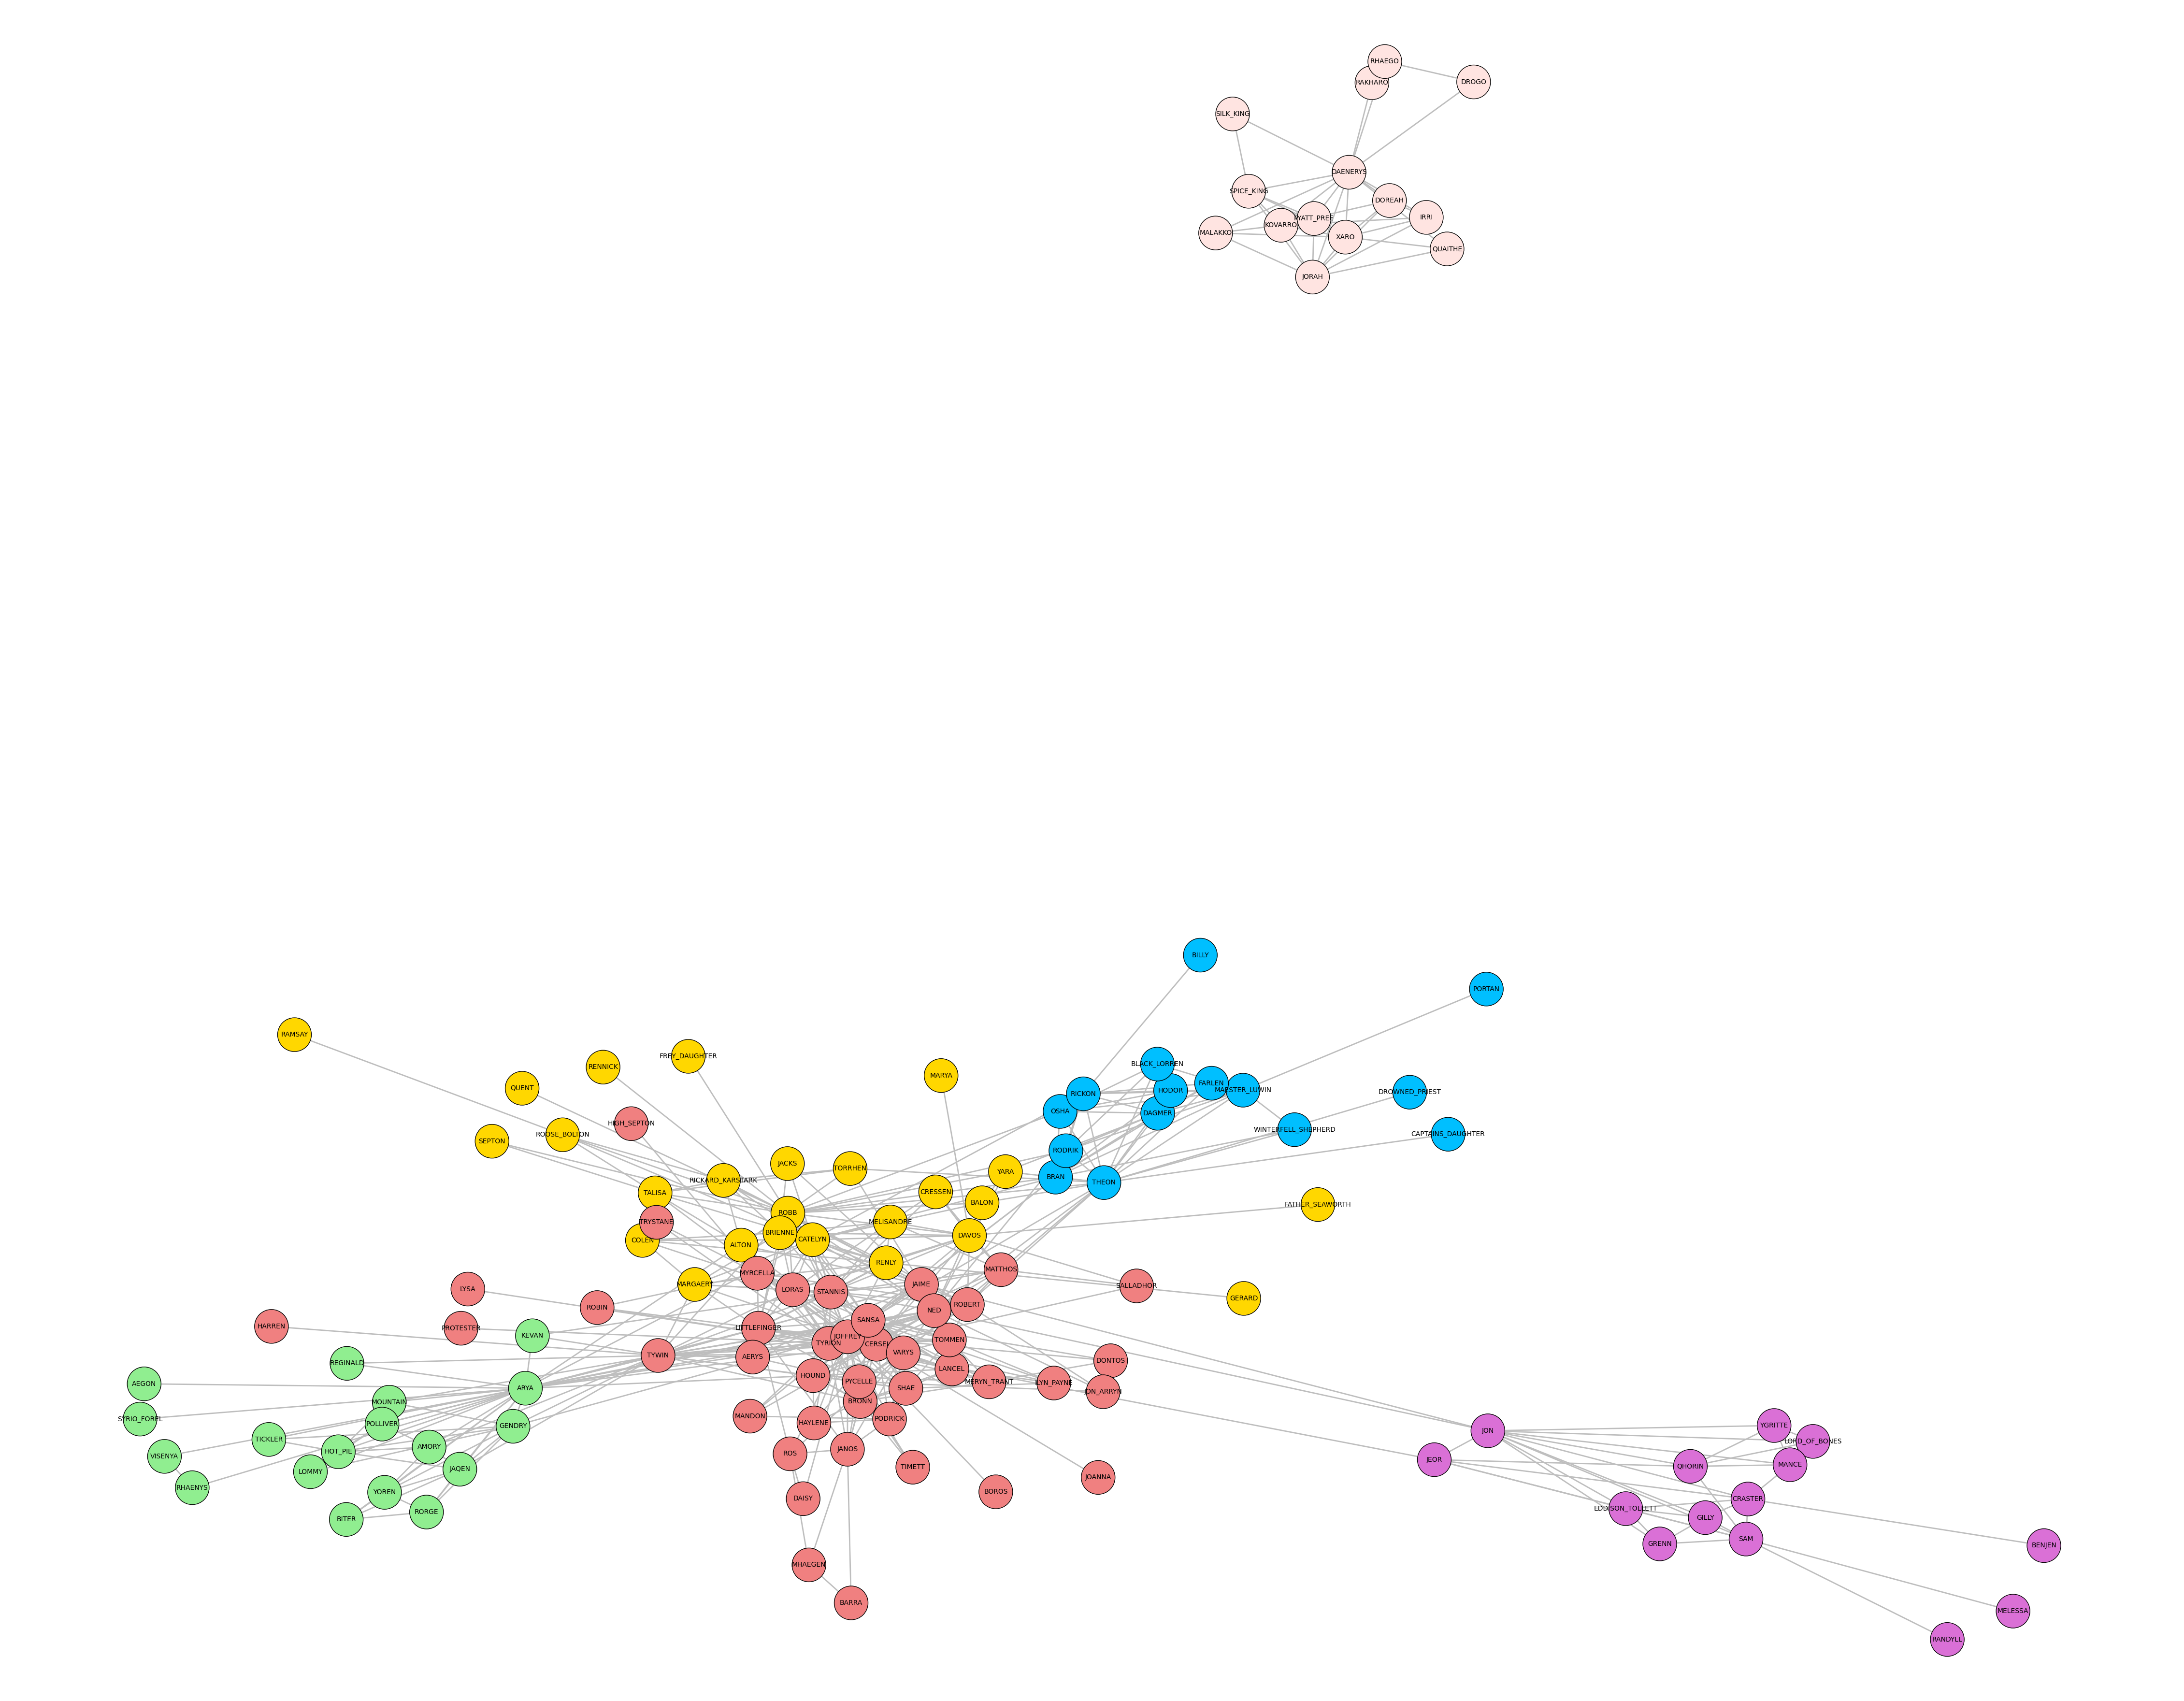

In [ ]:
community_graph_layout_gmm = nx.spring_layout(G)
# Prepare colors for the communities
colors = ["LightCoral", "Gold", "LightGreen", "DeepSkyBlue", "Orchid", "MistyRose", "Cyan"]
node_colors = []
node_sizes = []

for node in G.nodes():
    for i, community in enumerate(gmm_comm):
        if node in community:
            node_colors.append(colors[i % len(colors)])
            node_sizes.append(70)
            break

# Add positions to igraph nodes
positions = community_graph_layout_gmm
g.vs["x"] = [positions[node][0] for node in G.nodes()]
g.vs["y"] = [positions[node][1] for node in G.nodes()]


# Plot the graph with igraph
fig, ax = plt.subplots(figsize=(45, 35))
ax.set_xlim(min(g.vs["x"])-0.05, max(g.vs["x"])+0.05)
ax.set_ylim(min(g.vs["y"])-0.05, max(g.vs["y"])+0.05)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('auto')
fig.subplots_adjust(left=0, right=1, top=1, bottom=0)

ig.plot(
    g,
    target=ax,
    layout=[(pos[0], pos[1]) for pos in positions.values()],
    vertex_color=node_colors,
    vertex_size=node_sizes,
    vertex_label=g.vs["Label"],
    vertex_label_size = 10,
    edge_color = "grey"

)


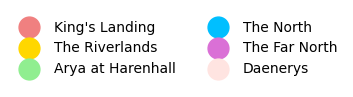

In [ ]:
fig_legend, ax_legend = plt.subplots(figsize=(2,1))

# Hardcoding each legend entry
ax_legend.plot([], [], color="LightCoral", marker='o', markersize=15, linestyle='None', label="King's Landing")
ax_legend.plot([], [], color="Gold", marker='o', markersize=15, linestyle='None', label="The Riverlands")
ax_legend.plot([], [], color="LightGreen", marker='o', markersize=15, linestyle='None', label="Arya at Harenhall")
ax_legend.plot([], [], color="DeepSkyBlue", marker='o', markersize=15, linestyle='None', label="The North")
ax_legend.plot([], [], color="Orchid", marker='o', markersize=15, linestyle='None', label="The Far North")
ax_legend.plot([], [], color="MistyRose", marker='o', markersize=15, linestyle='None', label="Daenerys")

ax_legend.legend(loc='center', frameon=False, ncol=2)
ax_legend.axis('off')

plt.show()

In [ ]:
modularity_gmm = round(nx.community.modularity(G, gmm_comm),3)
print("The modularity for Greedy Modularity Maximization is", modularity_gmm)

The modularity for Greedy Modularity Maximization is 0.532


### Comparison

In [ ]:
community_methods =[]
community_methods.append("Infomap")
community_methods.append("Louvain")
community_methods.append("Girvan-Newmann")
community_methods.append("Greedy M.M.")
#community_methods.append("Clique Percolation")

methods_modularity = []
methods_modularity.append(modularity_infomap)
methods_modularity.append(modularity_louvain)
methods_modularity.append(modularity_g_n)
methods_modularity.append(modularity_gmm)
#methods_modularity.append(modularity_clique)

n_communities = []
n_communities.append(n_comm_infomap)
n_communities.append(n_comm_louvain)
n_communities.append(n_comm_g_n)
n_communities.append(n_comm_gmm)
#n_communities.append(n_comm_clique)

print("Comparison between Methods: Number of Communities and Modularity")
print(f"Infomap: {n_communities[0]}  -  {methods_modularity[0]}")
print(f"Louvain: {n_communities[1]}  -  {methods_modularity[1]}")
print(f"Girvan-Newman: {n_communities[2]}  -  {methods_modularity[2]}")
print(f"Greedy Modularity Maximization: {n_communities[3]}  -  {methods_modularity[3]}")
#print(f"Clique Percolation: {n_communities[4]}  -  {methods_modularity[4]}")

Comparison between Methods: Number of Communities and Modularity
Infomap: 8  -  0.561
Louvain: 7  -  0.563
Girvan-Newman: 5  -  0.477
Greedy Modularity Maximization: 6  -  0.532


In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 7))

# Number of communities per method
axs[0].bar(community_methods, n_communities)
for i, v in enumerate(n_communities):
    axs[0].text(i, v, str(v), ha='center', color='black')
axs[0].set_xlabel("Method")
axs[0].set_ylabel("# communities")
axs[0].set_title("Number of communities per method")
axs[0].set_xticks(range(len(community_methods)))
axs[0].set_xticklabels(community_methods, rotation='vertical')

# Modularities per method
axs[1].bar(community_methods, methods_modularity)
for i, v in enumerate(methods_modularity):
    axs[1].text(i, v, str(v), ha='center', color='black')
axs[1].set_xlabel("Method")
axs[1].set_ylabel("Modularity")
axs[1].set_title("Modularities per method")
axs[1].set_xticks(range(len(community_methods)))
axs[1].set_xticklabels(community_methods, rotation='vertical')

plt.tight_layout()
plt.show()

## Robustness

### Random Nodes Removal

In [ ]:
random_seed = 42
random.seed(random_seed)

def random_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = random.sample(graph_copy.nodes(), nodes)
    graph_copy.remove_nodes_from(nodes_to_remove)
    return graph_copy

random_res = {}
graphs = []
n_sample_to_remove = [5, 10, 15, 20, 25, 30, 35]

for i in n_sample_to_remove:
    new_graph = random_removal(G, i)
    a = nx.connected_components(new_graph)
    components = [len(c) for c in sorted(a, key=len, reverse=True)]
    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    random_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         '5 most central nodes - betwennes centrality': first5_bcen,
                         '5 most central nodes - closeness centrality': first5_ccen,
                         '5 most central nodes - eigenvector centrality': first5_ecen,
                         '5 most central nodes - harmonic centrality': first5_ccen,
                         '5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

In [ ]:
for i in n_sample_to_remove:
  print(random_res[i])

In [ ]:
#Get the nodes that now are without any link
for i in range(len(n_sample_to_remove)):
  Gcc = sorted(nx.connected_components(graphs[i]), key=len, reverse=True)
  if len(Gcc) > 1:
    Gcc.pop(0)
    print("Isolated nodes in the network: ",i, "is", Gcc)

In [ ]:
# based on centrality

def centrality_removal(graph, nodes):
    graph_copy = graph.copy()
    nodes_to_remove = list(centrality_df["Most central character - Betweenness "][0:nodes]) #list of the nodes to remove
    graph_copy.remove_nodes_from(nodes_to_remove)   #remove the nodes
    return graph_copy

centrality_res = {}           #dictionary in with append the new metrics
graphs = []                   #list of the new graphs to visualize
n_sample_to_remove = [1,3,5]  #list of number of nodes to delete

for i in n_sample_to_remove:
    new_graph = centrality_removal(G, i)      #remove nodes
    a = nx.connected_components(new_graph)    #get the components
    components = [len(c) for c in sorted(a, key=len, reverse=True)] #count the number of componentes (>1 if disconnected)
    """
    if len(components) ==1:   #if the grapgh is connected (never in this graph)
      #compute all the new metrics
      d =  nx.diameter(new_graph)
      s = nx.shortest_path(new_graph)
      a_s = nx.average_shortest_path_length(new_graph)
      bcen = nx.betweenness_centrality(new_graph)
      ccen = nx.closeness_centrality(new_graph)
      ecen = nx.eigenvector_centrality(new_graph)
      centrality_res[i] = {'diameter' : d, 'shortest path': s, 'average shortest path': a_s, 'betwennes centrality': bcen, 'closeness centrality': ccen,'eigenvector centrality': ecen}
    else:   #if the grapgh isn't connected
    """
    #compute all the new metrics
    #five most central nodes
    first5_bcen = list(dict(sorted(nx.betweenness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ccen = list(dict(sorted(nx.closeness_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_ecen = list(dict(sorted(nx.eigenvector_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_charm = list(dict(sorted(nx.harmonic_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]
    first5_cdegree = list(dict(sorted(nx.degree_centrality(new_graph).items(), key=lambda x:x[1], reverse=True)).keys())[0:5]

    #mean centrality
    mean_bcen = np.mean(list(nx.betweenness_centrality(new_graph).values()))
    mean_ccen = np.mean(list(nx.closeness_centrality(new_graph).values()))
    mean_ecen = np.mean(list(nx.eigenvector_centrality(new_graph).values()))
    mean_charm = np.mean(list(nx.harmonic_centrality(new_graph).values()))
    mean_cdegree = np.mean(list(nx.degree_centrality(new_graph).values()))

    #metric about the giant component - impossible to compute otherwise
    Gcc = sorted(nx.connected_components(new_graph), key=len, reverse=True)
    giant_component = G.subgraph(Gcc[0])

    avg_shortest_path = nx.average_shortest_path_length(giant_component)    #average shortest path
    d = nx.diameter(giant_component)                                        #diameter

    #dictionary
    centrality_res[i] = {'average shortest path': avg_shortest_path,
                         'diameter': d,
                         #'5 most central nodes - betwennes centrality': first5_bcen,
                         #'5 most central nodes - closeness centrality': first5_ccen,
                         #'5 most central nodes - eigenvector centrality': first5_ecen,
                         #'5 most central nodes - harmonic centrality': first5_ccen,
                         #'5 most central nodes - degree centrality': first5_ecen,
                         'Mean betwennes centrality': mean_bcen,
                         'Mean closeness centrality': mean_ccen,
                         'Mean eigenvector centrality': mean_ecen,
                         'Mean harmonic centrality': mean_ccen,
                         'Mean degree centrality': mean_ecen,
                         'number of components': len(components)}
    graphs.append(new_graph)

In [ ]:
#Get the nodes that now are without any link

Gcc = sorted(nx.connected_components(graphs[0]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the first network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[1]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the second network: ",Gcc)

Gcc = sorted(nx.connected_components(graphs[2]), key=len, reverse=True)
Gcc.pop(0)
print("Isolated nodes in the third network: ",Gcc)

## Link Prediction

### Preferential Attachment - Link Prediction

In [ ]:
#preferential attachment
preds = nx.preferential_attachment(G, list(nx.non_edges(G)))

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment

### Link Prediction between New Nodes

In [ ]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_one_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 1, seed=42, initial_graph=G)

In [ ]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_one_edge, one_node_one_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

In [ ]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
one_node_ten_edge = nx.barabasi_albert_graph(len(G.nodes())+1, 10, seed=42, initial_graph=G)

In [ ]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(one_node_ten_edge, one_node_ten_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
preferential_attachment[(preferential_attachment["First node"] == len(G)) | (preferential_attachment["Second node"] == len(G))]

In [ ]:
#Returns a random graph using Barabási–Albert preferential attachment
#A graph of nodes is grown by attaching new nodes each with edges that are preferentially attached to existing nodes with high degree.

#the first number n is how many node we want to have in the new graph (old + new nodes)
#and the second number m is the umber of edges to attach from a new node to existing nodes

#Barabási–Albert network must have m >= 1 and m < n
nodes_to_add = 10
ten_node_three_edge = nx.barabasi_albert_graph(len(G.nodes())+nodes_to_add, int(davg), seed=42, initial_graph=G)

In [ ]:
#adding a new node - preferential attachment
preds = nx.preferential_attachment(ten_node_three_edge, ten_node_three_edge.edges())

first_node = []
sec_node = []
score = []

for u, v, p in preds:
  first_node.append(u)
  sec_node.append(v)
  score.append(p)

preferential_attachment = pd.DataFrame(data = list(zip(first_node, sec_node, score)),
                             columns = ['First node', 'Second node', 'Score'])

preferential_attachment = preferential_attachment.sort_values("Score", ascending=False)
filtered_preferential_attachment = preferential_attachment[(preferential_attachment['First node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add))) |
                                                           (preferential_attachment['Second node'].isin(np.arange(len(G.nodes()), len(G.nodes())+nodes_to_add)))]
filtered_preferential_attachment

In [ ]:
filtered_preferential_attachment_counts = filtered_preferential_attachment['First node'].value_counts()
filtered_preferential_attachment_counts

In [ ]:
filtered_chars =  list(dict(filtered_preferential_attachment_counts).keys())[0:10]
filtered_values = list(dict(filtered_preferential_attachment_counts).values())[0:10]

In [ ]:
#Modularities per method

"""
Function that we'll use later for add the value in barplots
"""
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

plt.bar(filtered_chars,filtered_values)
addlabels(filtered_chars,filtered_values)
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel("Characters")
plt.ylabel("Frequency in which a node were linked")
plt.title("The most influenced characters")
plt.show()